In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [247]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Dataset de teste possui apenas 43 colunas e dataset de treino possui 167

In [248]:
print(f'Shape Test: {test.shape} and Shape Train: {train.shape}')

Shape Test: (4570, 43) and Shape Train: (13730, 167)


### Lista de variáveis presentes no dataset de teste

In [249]:
test_features = list(test)
train_features = list(train)

In [250]:
newtrain_features = list(set(train_features).intersection(set(test_features)))

newtrain_features.append('IN_TREINEIRO')

train = train[newtrain_features]

print(f'New shape of train {train.shape}')

New shape of train (13730, 44)


In [251]:
train = train.drop('NU_INSCRICAO', axis = 1)
test = test.drop('NU_INSCRICAO', axis = 1)

object_features_train = list(train.select_dtypes(include = 'object'))
object_features_test = list(test.select_dtypes(include = 'object'))

feat_le_train = [train.columns.get_loc(a) for a in object_features_train]
feat_le_test = [test.columns.get_loc(a) for a in object_features_test]

In [252]:
pd.set_option('display.max_columns', 500)

train.head()

,IN_DISLEXIA,TP_PRESENCA_CH,NU_NOTA_COMP2,NU_NOTA_COMP4,Q001,CO_UF_RESIDENCIA,Q027,TP_COR_RACA,IN_BAIXA_VISAO,TP_ANO_CONCLUIU,Q002,TP_ENSINO,IN_GESTANTE,TP_PRESENCA_LC,SG_UF_RESIDENCIA,NU_IDADE,NU_NOTA_CH,IN_SURDEZ,IN_CEGUEIRA,TP_ESCOLA,TP_LINGUA,NU_NOTA_COMP3,IN_SABATISTA,TP_STATUS_REDACAO,Q026,TP_DEPENDENCIA_ADM_ESC,TP_NACIONALIDADE,Q006,TP_PRESENCA_CN,Q025,NU_NOTA_REDACAO,Q047,NU_NOTA_CN,TP_SEXO,IN_DISCALCULIA,NU_NOTA_COMP1,Q024,NU_NOTA_COMP5,NU_NOTA_LC,TP_PRESENCA_MT,TP_ST_CONCLUSAO,IN_IDOSO,IN_TREINEIRO
0,0,1,120.0,80.0,D,43,H,1,0,4,D,NaN,0,1,RS,24,495.4,0,0,1,1,120.0,0,1.0,C,NaN,1,C,1,A,520.0,A,436.3,M,0,120.0,A,80.0,581.2,1,1,0,0
1,0,1,120.0,120.0,A,23,NaN,3,0,0,A,1.0,0,1,CE,17,544.1,0,0,2,1,120.0,0,1.0,A,2.0,1,B,1,A,580.0,A,474.5,F,0,140.0,A,80.0,599.0,1,2,0,0
2,0,0,NaN,NaN,D,23,NaN,3,0,0,D,NaN,0,0,CE,21,NaN,0,0,1,1,NaN,0,NaN,A,NaN,1,C,0,A,NaN,A,NaN,F,0,NaN,A,NaN,NaN,0,3,0,0
3,0,0,NaN,NaN,H,33,F,0,0,9,E,NaN,0,0,RJ,25,NaN,0,0,1,0,NaN,0,NaN,C,NaN,1,E,0,B,NaN,D,NaN,F,0,NaN,C,NaN,NaN,0,1,0,0
4,0,0,NaN,NaN,E,13,F,2,0,4,D,NaN,0,0,AM,28,NaN,0,0,1,1,NaN,0,NaN,B,NaN,1,C,0,A,NaN,A,NaN,M,0,NaN,A,NaN,NaN,0,1,0,0


In [253]:
train.dtypes

IN_DISLEXIA                 int64
TP_PRESENCA_CH              int64
NU_NOTA_COMP2             float64
NU_NOTA_COMP4             float64
Q001                       object
CO_UF_RESIDENCIA            int64
Q027                       object
TP_COR_RACA                 int64
IN_BAIXA_VISAO              int64
TP_ANO_CONCLUIU             int64
Q002                       object
TP_ENSINO                 float64
IN_GESTANTE                 int64
TP_PRESENCA_LC              int64
SG_UF_RESIDENCIA           object
NU_IDADE                    int64
NU_NOTA_CH                float64
IN_SURDEZ                   int64
IN_CEGUEIRA                 int64
TP_ESCOLA                   int64
TP_LINGUA                   int64
NU_NOTA_COMP3             float64
IN_SABATISTA                int64
TP_STATUS_REDACAO         float64
Q026                       object
TP_DEPENDENCIA_ADM_ESC    float64
TP_NACIONALIDADE            int64
Q006                       object
TP_PRESENCA_CN              int64
Q025          

In [254]:
def obj2str(df, features):
    for a in features:
        df[a] = df[a].astype(str)
    return df

train = obj2str(train, object_features_train)
test = obj2str(test, object_features_test)

In [255]:
from sklearn.preprocessing import LabelEncoder
labelencoder_previsores = LabelEncoder()

def label_encoder(df, feat_le):
    le = LabelEncoder()
    for ft in feat_le:
        df[:,ft] = le.fit_transform(df[:,ft])
    return df 

train = pd.DataFrame(label_encoder(train.values, feat_le_train), columns = train.columns).astype(float)
test = pd.DataFrame(label_encoder(test.values, feat_le_test), columns = test.columns).astype(float)

# Análise de correlação para encontrar quais variáveis possuem maior influência sobre IN_TREINEIRO

- Observa-se que até o quinto elemento há uma correlação próxima ou acima de 0,1. 
- Após a feature TP_PRESENCA_LC a correlação cai para valores próximos de 0,01. 

In [256]:
type(train)

pandas.core.frame.DataFrame

In [257]:
corr = train.corr()

corr.IN_TREINEIRO.sort_values(ascending = False)[:15]

IN_TREINEIRO         1.000000
TP_ST_CONCLUSAO      0.533983
Q027                 0.244396
TP_PRESENCA_CH       0.094692
TP_PRESENCA_CN       0.094692
TP_PRESENCA_MT       0.092454
TP_PRESENCA_LC       0.092454
Q002                 0.090212
Q001                 0.074647
Q047                 0.069564
Q006                 0.017735
Q024                 0.011875
TP_COR_RACA          0.009676
TP_STATUS_REDACAO    0.006688
IN_SABATISTA         0.003824
Name: IN_TREINEIRO, dtype: float64

In [258]:
corr_pos = list(corr.IN_TREINEIRO.sort_values(ascending= False)[1:12].index); corr_pos

['TP_ST_CONCLUSAO',
 'Q027',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_MT',
 'TP_PRESENCA_LC',
 'Q002',
 'Q001',
 'Q047',
 'Q006',
 'Q024']

In [259]:
corr.IN_TREINEIRO.sort_values(ascending =  True)[:10]

NU_IDADE           -0.295091
Q026               -0.260433
TP_ANO_CONCLUIU    -0.257710
TP_ESCOLA          -0.244562
SG_UF_RESIDENCIA   -0.102582
NU_NOTA_CH         -0.053460
NU_NOTA_CN         -0.037874
TP_LINGUA          -0.036395
CO_UF_RESIDENCIA   -0.034944
NU_NOTA_COMP3      -0.030147
Name: IN_TREINEIRO, dtype: float64

In [260]:
corr_neg = list(corr.IN_TREINEIRO.sort_values(ascending=True)[:5].index); corr_neg

['NU_IDADE', 'Q026', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'SG_UF_RESIDENCIA']

In [261]:
corr_list = corr_pos + corr_neg; corr_list

['TP_ST_CONCLUSAO',
 'Q027',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_MT',
 'TP_PRESENCA_LC',
 'Q002',
 'Q001',
 'Q047',
 'Q006',
 'Q024',
 'NU_IDADE',
 'Q026',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'SG_UF_RESIDENCIA']

### Atribuição das features que serão utilizadas no treinamento do modelo

In [237]:
train  = train[corr_list + ['IN_TREINEIRO']]
test = test[corr_list]

print(f'Train columns {train.columns} and test columns {test.columns}')

Train columns Index(['TP_ST_CONCLUSAO', 'Q027', 'TP_PRESENCA_CH', 'TP_PRESENCA_CN',
       'TP_PRESENCA_MT', 'TP_PRESENCA_LC', 'Q002', 'Q001', 'Q047', 'Q006',
       'Q024', 'NU_IDADE', 'Q026', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'SG_UF_RESIDENCIA', 'IN_TREINEIRO'],
      dtype='object') and test columns Index(['TP_ST_CONCLUSAO', 'Q027', 'TP_PRESENCA_CH', 'TP_PRESENCA_CN',
       'TP_PRESENCA_MT', 'TP_PRESENCA_LC', 'Q002', 'Q001', 'Q047', 'Q006',
       'Q024', 'NU_IDADE', 'Q026', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'SG_UF_RESIDENCIA'],
      dtype='object')


## Há valores faltantes?

In [238]:
train.isnull().sum()

TP_ST_CONCLUSAO     0
Q027                0
TP_PRESENCA_CH      0
TP_PRESENCA_CN      0
TP_PRESENCA_MT      0
TP_PRESENCA_LC      0
Q002                0
Q001                0
Q047                0
Q006                0
Q024                0
NU_IDADE            0
Q026                0
TP_ANO_CONCLUIU     0
TP_ESCOLA           0
SG_UF_RESIDENCIA    0
IN_TREINEIRO        0
dtype: int64

### Observa-se que há outliers

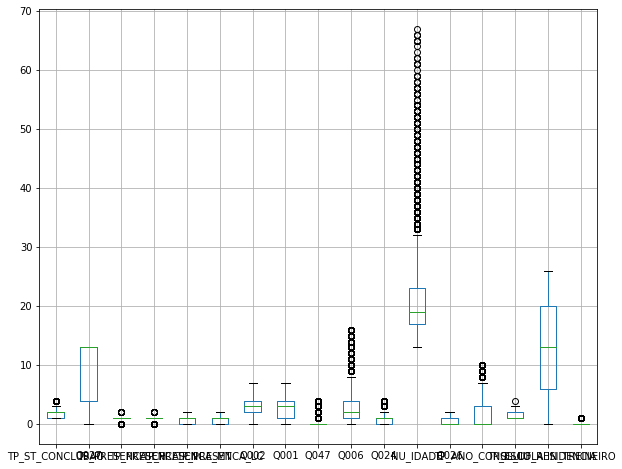

In [239]:
plt.figure(figsize = (10,8))
train.boxplot()

### Os dados estão desbalanceados

In [240]:
train.IN_TREINEIRO.value_counts()

0.0    11947
1.0     1783
Name: IN_TREINEIRO, dtype: int64

### Separação dos dados entre treinaamento e validação

In [241]:
X = train.drop('IN_TREINEIRO', axis = 1)
y = train['IN_TREINEIRO']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [242]:
from sklearn.ensemble import RandomForestClassifier

model =  RandomForestClassifier(n_estimators=200,
                                criterion = 'entropy',
                                   random_state=42)

model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Predição com métricas de performance do modelo

In [243]:
predicao = model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

matriz = confusion_matrix(y_test, predicao); matriz

acuracia = accuracy_score(y_test, predicao); acuracia

print('Matriz de confusão \n:', matriz, '\n \n Acurácia do modelo sobre os dados de validação ',acuracia)

Matriz de confusão 
: [[3576    1]
 [  12  530]] 
 
 Acurácia do modelo sobre os dados de validação  0.9968438941490653


### Previsão para os dados submission:

In [244]:
submission_predict = model.predict(test)

In [245]:
test = pd.read_csv('test.csv')

new_df = np.array(list(zip(test.NU_INSCRICAO.values, submission_predict)))

df_answer = pd.DataFrame(new_df, 
                         columns = ['NU_INSCRICAO','IN_TREINEIRO'])

df_answer.to_csv('answer.csv', sep = ',', index = False)